## 빅데이터 응용 Final 프로젝트 과제 내용

빅데이터 응용 Final 프로젝트과제 2020-06-10 00:00:00 ~ 2020-06-26 23:59:00
- 다양한 데이터셋을 시각화하여 분석하는 프로젝트
- 평가방법 : 데이터의 시각화, 데이터의 분석 등
- 데이터셋을 하나 선정하여 창의적으로 여러방식으로 분석해보시기 바랍니다.
- Jupyter notebook file, readme file, pdf file, dataset file 네가지 압축하여 제출 (파일명: 학번_이름.zip)


 Readme 파일: 데이터출처, 추가 패키지 설치 필요한 경우 설명 작성

pdf 파일: jupyter notebook 단순 변환
- 데이터셋 참조

https://brunch.co.kr/@data/10

https://brunch.co.kr/@jowlee/118

- 프로젝트 예시 참조

Lecture 13,1410

Kaggle notebook (포함 온라인의 모든 자료들)

Contents of the Notebook:¶
Part1: Exploratory Data Analysis(EDA):
1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

Part2: Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

##  문제 정의 및 데이터 수집

어떤 데이터를 골라야 할지 고민을 많이 했습니다.
타이타닉 데이터 처럼, 
1. 데이터가 많아야 하고, 
2. 이거 해볼만하겠는데?
라는 기준으로

https://brunch.co.kr/@jowlee/118

위 에서 제공하는 다양한 데이터를 조회하였습니다.

그중에 제가 마음에 든것은 바로

도로교통공단에서 제공하는 교통사고 분석 시스템이였습니다.
http://taas.koroad.or.kr/

위에서 저는
http://taas.koroad.or.kr/api/selectDeathDataSet.do

사고별 사망자 정보 csv 파일을 얻을 수 있었습니다.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

#https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221225208497&proxyReferer=https:%2F%2Fwww.google.com%2F
# 위를 참고하여 한글 깨짐 해결.

font_location = './NanumFontSetup_TTF_SQUARE/NanumSquareB.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [4]:
#data=pd.read_csv('12_19_death.csv',encoding = 'utf-8')
# 위 코드는 오류가 났다. 오류 메세지는 
#'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte
# 위와 같았고
# 자세히 알아보니, file의 encoding 방식이 다른 것.
# 그래서 저는 excel을 이용해  12_19_death.csv를 csv-utf-8로 저장함으로써 해결하였습니다.

data=pd.read_csv('12_19_death_utf8.csv',encoding = 'utf-8')

In [5]:
#importing_test=pd.read_csv('C:/Users/like_/NaverCloud/2020년/학교 수업/빅데이터 응용/SourceCode/12_19_death.csv',engine='python')

## Exploratory Data Analysis(EDA):

### 데이터 전처리

In [6]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 27,Unnamed: 28
0,2012,2012010101,50,야간,일,1,1,0,0,0,...,승용차,중형,보행자,보행자,949860,949860,126.931891,37.612680,NaN,NaN
1,2012,2012010101,5,야간,일,1,6,5,0,0,...,승용차,중형,승용차,소형,946537,946537,126.909523,35.633956,NaN,NaN
2,2012,2012010108,50,주간,일,1,1,0,0,0,...,승용차,소형,없음,없음,940016,940016,126.830281,36.491268,NaN,NaN
3,2012,2012010110,25,주간,일,2,2,0,0,0,...,승합차,대형,승용차,소형,1059321,1059321,128.155984,35.733503,NaN,NaN
4,2012,2012010103,30,야간,일,1,1,0,0,0,...,승용차,중형,없음,없음,1070222,1070222,128.284180,36.506769,NaN,NaN


#### 몇건의 데이터, 그리고 column의 개수는

In [7]:
data.shape

(34145, 29)

3만 4천개의 데이터, 그리고 column의 개수는 29개 였습니다.

#### column은 무엇이 있나

In [8]:
data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

#### 의미 없는 컬럼의 삭제

발생위치X_UTMK	발생위치Y_UTMK	경도	위도
데이터는 알아봤자 잘 활용을 못할 거 같아서 지우겠습니다.

또한 Unnamed: 27, Unnamed: 27 은 의미 없는 데이터가 들어 있어 삭제하겠습니다.

In [9]:
#data.drop(['발생위치X_UTMK', '발생위치Y_UTMK' , '경도' ,'위도'], axis =1)
data = data.drop(['발생위치X_UTMK', '발생위치Y_UTMK' , '경도' ,'위도','Unnamed: 27', 'Unnamed: 28'], axis =1)

In [10]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당
0,2012,2012010101,50,야간,일,1,1,0,0,0,...,차도통행중,차도통행중,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,보행자,보행자
1,2012,2012010101,5,야간,일,1,6,5,0,0,...,정면충돌,정면충돌,운전자법규위반,중앙선 침범,단일로,기타단일로,승용차,중형,승용차,소형
2,2012,2012010108,50,주간,일,1,1,0,0,0,...,공작물충돌,공작물충돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,소형,없음,없음
3,2012,2012010110,25,주간,일,2,2,0,0,0,...,측면충돌,측면충돌,운전자법규위반,제한속도 위반(20KM 초과시),교차로,교차로내,승합차,대형,승용차,소형
4,2012,2012010103,30,야간,일,1,1,0,0,0,...,도로이탈,도로이탈 추락,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,없음,없음


### 결측치가 있나 확인 

In [11]:
data.isnull().sum()

발생년             0
발생년월일시          0
발생분             0
주야              0
요일              0
사망자수            0
사상자수            0
중상자수            0
경상자수            0
부상신고자수          0
발생지시도           0
발생지시군구          0
사고유형_대분류        0
사고유형_중분류        0
사고유형            0
법규위반_대분류        0
법규위반            0
도로형태_대분류        0
도로형태            0
당사자종별_1당_대분류    0
당사자종별_1당        0
당사자종별_2당_대분류    0
당사자종별_2당        0
dtype: int64

다행스럽게 null 값이 하나도 없습니다.


저는 사고 유형을 주시했고, 어떤 값이 사고 유형에 영향을 끼쳤을 까 시각해 보고, 조사해보도록 하겠습니다.

### 사상자 수의 평균

In [12]:
data.describe()

,발생년,발생년월일시,발생분,사망자수,사상자수,중상자수,경상자수,부상신고자수
count,34145.000000,3.414500e+04,34145.000000,34145.000000,34145.000000,34145.000000,34145.000000,34145.00000
mean,2015.185152,2.015254e+09,27.219710,1.038922,1.608932,0.279865,0.258515,0.03163
std,2.260179,2.260353e+06,17.396288,0.243548,2.042292,0.981340,1.186744,0.51744
min,2012.000000,2.012010e+09,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000
25%,2013.000000,2.013092e+09,11.000000,1.000000,1.000000,0.000000,0.000000,0.00000
50%,2015.000000,2.015080e+09,28.000000,1.000000,1.000000,0.000000,0.000000,0.00000
75%,2017.000000,2.017082e+09,41.000000,1.000000,2.000000,0.000000,0.000000,0.00000
max,2019.000000,2.019123e+09,59.000000,10.000000,105.000000,54.000000,68.000000,67.00000


사상자 수는 평균 2명이였습니다.
그리고 최소 1명, 그리고 최대 105명이였음을 알수 있습니다.

In [13]:
data['사상자수'].value_counts()

1      25284
2       4772
3       1854
4        926
5        495
6        247
7        151
8         98
9         68
11        38
10        38
12        31
13        17
15        14
14        14
18        13
19        10
17         9
20         8
22         6
16         6
27         5
25         5
24         4
31         3
43         3
21         2
37         2
34         2
28         2
35         2
26         2
44         1
57         1
39         1
29         1
100        1
36         1
47         1
67         1
51         1
23         1
105        1
60         1
33         1
40         1
Name: 사상자수, dtype: int64

In [14]:
data[data['사상자수']>=3].shape

(4089, 23)

사상자 수 3명 이상은 너무 적습니다. 그래서 새로운 분류를 밑에서 만들어 보겠습니다.

#### 사상자수로 부터 새로운 컬럼 사상자 분류를 만들고, 3명이상의 사상자는 3분류로 만들기

In [15]:
data['사상자분류']=data['사상자수']
data.loc[data['사상자분류']>=3, '사상자분류']=3 

In [16]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,사상자분류
0,2012,2012010101,50,야간,일,1,1,0,0,0,...,차도통행중,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,보행자,보행자,1
1,2012,2012010101,5,야간,일,1,6,5,0,0,...,정면충돌,운전자법규위반,중앙선 침범,단일로,기타단일로,승용차,중형,승용차,소형,3
2,2012,2012010108,50,주간,일,1,1,0,0,0,...,공작물충돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,소형,없음,없음,1
3,2012,2012010110,25,주간,일,2,2,0,0,0,...,측면충돌,운전자법규위반,제한속도 위반(20KM 초과시),교차로,교차로내,승합차,대형,승용차,소형,2
4,2012,2012010103,30,야간,일,1,1,0,0,0,...,도로이탈 추락,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,없음,없음,1


### 사고 유형 대분류의 분포

In [17]:
data['사고유형_대분류'].value_counts()

차대차      13484
차대사람     13367
차량단독      7285
철길건널목        9
Name: 사고유형_대분류, dtype: int64

In [18]:
data.사고유형_대분류.unique()

array(['차대사람', '차대차', '차량단독', '철길건널목'], dtype=object)

차대사람, 차대차, 차량단독, 철길건널목 총 4개의 데이터가 있었습니다. 비율은 어떠할까요?

Text(0.5, 1.0, '전체 사고의 사고유형_대분류별 분류')

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.


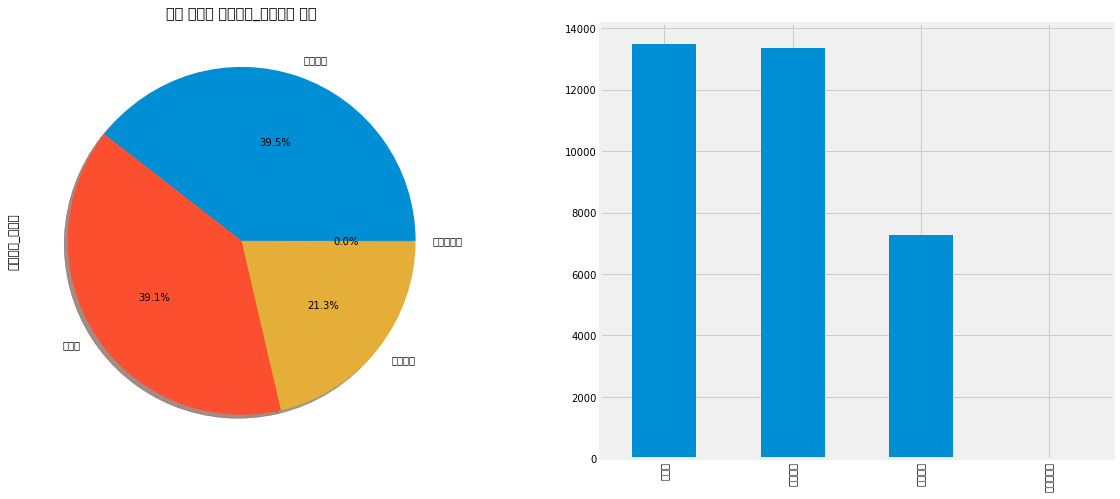

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
labels = list(data.사고유형_대분류.unique())
#data['사고유형_대분류'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
data['사고유형_대분류'].value_counts().plot.pie(autopct='%1.1f%%', labels=labels,ax=ax[0],shadow=True)

#data['사고유형_대분류'].value_counts().plot
data['사고유형_대분류'].value_counts().plot.bar(ax=ax[1])
ax[0].set_title('전체 사고의 사고유형_대분류별 분류')


#### 너무 적은 데이터 철길건널목 삭제

In [20]:
idx_numbers = data[data['사고유형_대분류'] == '철길건널목'].index

idx_numbers 

Int64Index([385, 3402, 6228, 8850, 18705, 24726, 27680, 29864, 32554], dtype='int64')

In [21]:
data = data.drop(idx_numbers)

In [22]:
data['사고유형_대분류'].value_counts()

차대차     13484
차대사람    13367
차량단독     7285
Name: 사고유형_대분류, dtype: int64

### 사상자 분류 에 따른 사고유형_대분류

In [23]:
data[data['사상자분류']==1].groupby(['사고유형_대분류'])['사고유형_대분류'].count()

사고유형_대분류
차대사람    12341
차대차      7214
차량단독     5723
Name: 사고유형_대분류, dtype: int64

Text(0.5, 1.0, '전체 사고의 사고유형_대분류별 분류')

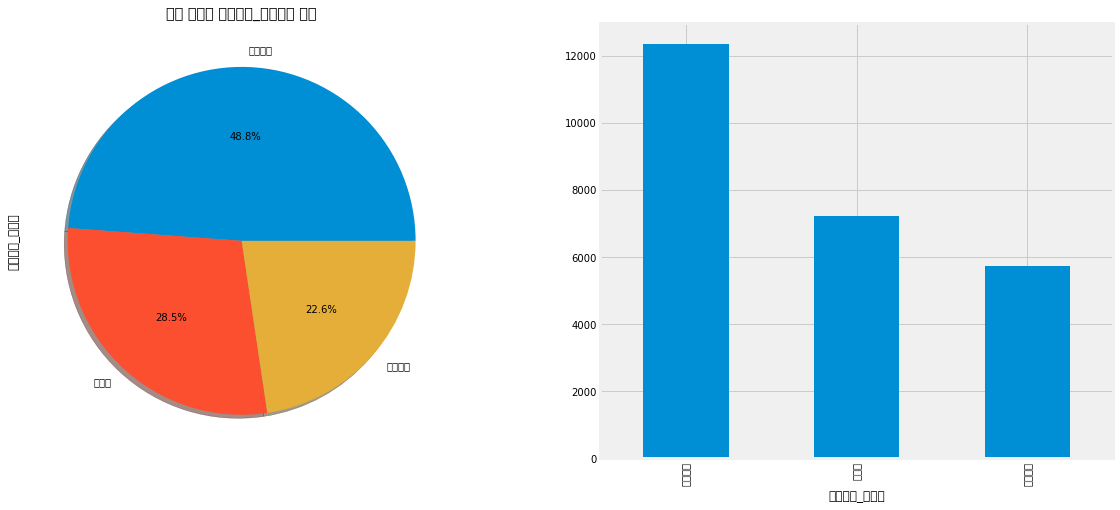

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
labels = list(data.사고유형_대분류.unique())
#data['사고유형_대분류'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
data[data['사상자분류']==1].groupby(['사고유형_대분류'])['사고유형_대분류'].count().plot.pie(autopct='%1.1f%%', labels=labels,ax=ax[0],shadow=True)

#data['사고유형_대분류'].value_counts().plot
data[data['사상자분류']==1].groupby(['사고유형_대분류'])['사고유형_대분류'].count().plot.bar(ax=ax[1])
ax[0].set_title('전체 사고의 사고유형_대분류별 분류')


In [25]:
data[data['사상자분류']==2].groupby(['사고유형_대분류'])['사고유형_대분류'].count()

사고유형_대분류
차대사람     745
차대차     3063
차량단독     963
Name: 사고유형_대분류, dtype: int64

In [26]:
data[data['사상자분류']==3].groupby(['사고유형_대분류'])['사고유형_대분류'].count()

사고유형_대분류
차대사람     281
차대차     3207
차량단독     599
Name: 사고유형_대분류, dtype: int64

차대사람분류가 사상자 1명인 케이스에서 제일 많았습니다. 그리고 사상자분류가 1,2인 케이스에서 차대차 분류가 가장 많았습니다.

### 사고유형 대분류 별 평균 사상자수

In [27]:
data[['사상자수','사고유형_대분류']].groupby(['사고유형_대분류']).mean()

,사상자수
사고유형_대분류,
차대사람,1.117453
차대차,2.201053
차량단독,1.414825


Text(0.5, 1.0, '사고유형_대분류별 분류에 따른 평균 사상자 수')

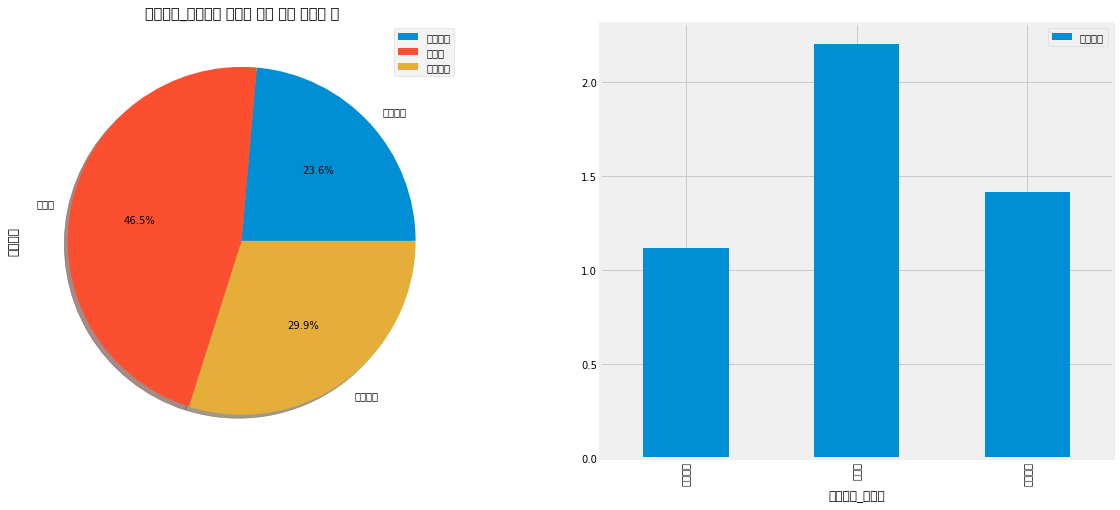

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
labels = list(data.사고유형_대분류.unique())
#data['사고유형_대분류'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
data[['사상자수','사고유형_대분류']].groupby(['사고유형_대분류']).mean().plot.pie(autopct='%1.1f%%', labels=labels,ax=ax[0],shadow=True, subplots=True)

#data['사고유형_대분류'].value_counts().plot
data[['사상자수','사고유형_대분류']].groupby(['사고유형_대분류']).mean().plot.bar(ax=ax[1])
ax[0].set_title('사고유형_대분류별 분류에 따른 평균 사상자 수')


아, 차대차가 사상자 평균 값이 높구나를 알수 있었습니다.

### 주야에 따른 사상자 대분류

In [29]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,사상자분류
0,2012,2012010101,50,야간,일,1,1,0,0,0,...,차도통행중,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,보행자,보행자,1
1,2012,2012010101,5,야간,일,1,6,5,0,0,...,정면충돌,운전자법규위반,중앙선 침범,단일로,기타단일로,승용차,중형,승용차,소형,3
2,2012,2012010108,50,주간,일,1,1,0,0,0,...,공작물충돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,소형,없음,없음,1
3,2012,2012010110,25,주간,일,2,2,0,0,0,...,측면충돌,운전자법규위반,제한속도 위반(20KM 초과시),교차로,교차로내,승합차,대형,승용차,소형,2
4,2012,2012010103,30,야간,일,1,1,0,0,0,...,도로이탈 추락,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,없음,없음,1


In [30]:
data['주야분류']=data['주야']

In [31]:
data['주야분류'].value_counts()

야간    17381
주간    16755
Name: 주야분류, dtype: int64

In [32]:
data.loc[data['주야분류']=='주간', '주야분류'] =0

In [33]:
data.loc[data['주야분류']=='야간', '주야분류'] =1

In [34]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,사상자분류,주야분류
0,2012,2012010101,50,야간,일,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,보행자,보행자,1,1
1,2012,2012010101,5,야간,일,1,6,5,0,0,...,운전자법규위반,중앙선 침범,단일로,기타단일로,승용차,중형,승용차,소형,3,1
2,2012,2012010108,50,주간,일,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,소형,없음,없음,1,0
3,2012,2012010110,25,주간,일,2,2,0,0,0,...,운전자법규위반,제한속도 위반(20KM 초과시),교차로,교차로내,승합차,대형,승용차,소형,2,0
4,2012,2012010103,30,야간,일,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,없음,없음,1,1


In [35]:
data[data['주야분류']==0].groupby(['사고유형_대분류'])['사고유형_대분류'].count()

사고유형_대분류
차대사람    5158
차대차     7818
차량단독    3779
Name: 사고유형_대분류, dtype: int64

주간에는 차대차 사고 비율이 많았습니다.

In [36]:
data[data['주야분류']==1].groupby(['사고유형_대분류'])['사고유형_대분류'].count()

사고유형_대분류
차대사람    8209
차대차     5666
차량단독    3506
Name: 사고유형_대분류, dtype: int64

야간에는  차대사람 사고 비율이 높았습니다.

Text(0.5, 1.0, '야간 사고의 사고유형_대분류별 분류')

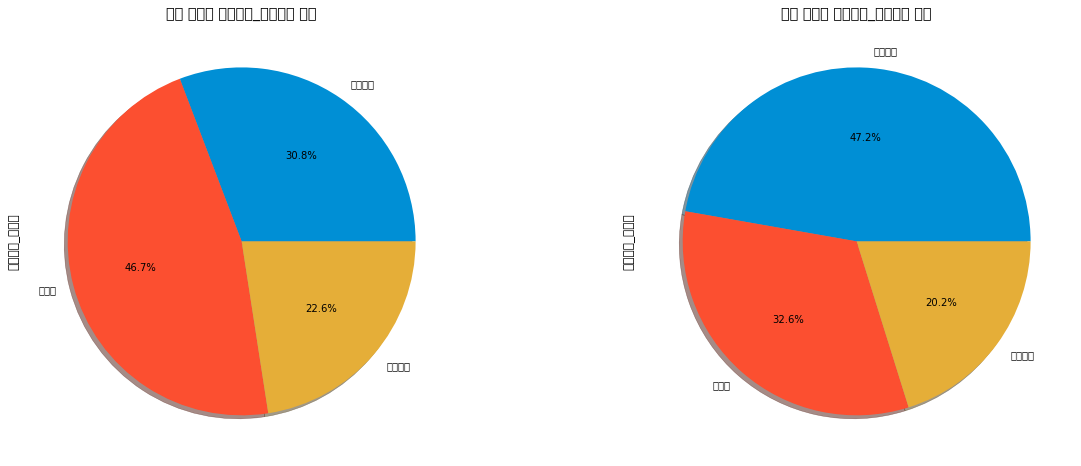

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))
labels = list(data.사고유형_대분류.unique())
#data['사고유형_대분류'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
data[data['주야분류']==0].groupby(['사고유형_대분류'])['사고유형_대분류'].count().plot.pie(autopct='%1.1f%%', labels=labels,ax=ax[0],shadow=True)

#data['사고유형_대분류'].value_counts().plot
data[data['주야분류']==1].groupby(['사고유형_대분류'])['사고유형_대분류'].count().plot.pie(autopct='%1.1f%%', labels=labels,ax=ax[1],shadow=True)
ax[0].set_title('주간 사고의 사고유형_대분류별 분류')
ax[1].set_title('야간 사고의 사고유형_대분류별 분류')


주간에는 차대차, 야간에는 차대사람 사고의 비율이 제일 컸습니다.

### 요일에 따른 사상자 대분류 - 의미 없음.

In [38]:
data['요일'].value_counts()

금    5121
월    5033
토    5027
화    4982
목    4878
수    4835
일    4260
Name: 요일, dtype: int64

In [39]:
oneTosevenList= list(range(7))
oneTosevenList

[0, 1, 2, 3, 4, 5, 6]

In [40]:
data['요일'].replace(['일','월','화','수','목','금', '토'],oneTosevenList,inplace=True)

In [41]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,사상자분류,주야분류
0,2012,2012010101,50,야간,0,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,보행자,보행자,1,1
1,2012,2012010101,5,야간,0,1,6,5,0,0,...,운전자법규위반,중앙선 침범,단일로,기타단일로,승용차,중형,승용차,소형,3,1
2,2012,2012010108,50,주간,0,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,소형,없음,없음,1,0
3,2012,2012010110,25,주간,0,2,2,0,0,0,...,운전자법규위반,제한속도 위반(20KM 초과시),교차로,교차로내,승합차,대형,승용차,소형,2,0
4,2012,2012010103,30,야간,0,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,없음,없음,1,1


In [42]:
dateList = ['일','월','화','수','목','금', '토']

In [43]:
data[data['요일']==1]

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,사상자분류,주야분류
6,2012,2012010210,0,주간,1,2,2,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,없음,없음,2,0
13,2012,2012010218,20,야간,1,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,교차로,교차로부근,승합차,소형,보행자,보행자,1,1
14,2012,2012010205,30,야간,1,1,2,0,1,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,대형,승용차,대형,2,1
20,2012,2012010220,15,야간,1,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,횡단보도부근,승용차,소형,보행자,보행자,1,1
32,2012,2012010213,35,주간,1,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,화물차,중형,없음,없음,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34119,2019,2019123007,49,주간,1,1,2,0,1,0,...,운전자법규위반,중앙선 침범,교차로,교차로내,승용차,승용차,승용차,승용차,2,0
34129,2019,2019112501,30,야간,1,1,1,0,0,0,...,운전자법규위반,안전운전 의무 불이행,단일로,교량위,승용차,승용차,없음,없음,1,1
34130,2019,2019120921,35,야간,1,1,4,0,0,3,...,운전자법규위반,안전운전 의무 불이행,교차로,교차로내,승용차,승용차,승용차,승용차,3,1
34131,2019,2019121610,40,주간,1,1,1,0,0,0,...,운전자법규위반,신호 또는 지시에 따를 의무위반(정지선 위반포함),교차로,교차로내,이륜차,이륜차,화물차,화물차,1,0


In [44]:
for i in range(7):
    print(dateList[i], '요일의 사고유형 대분류')
    print(data[data['요일']==i].groupby(['사고유형_대분류'])['사고유형_대분류'].count())
    print('\n---------\n')

일 요일의 사고유형 대분류
사고유형_대분류
차대사람    1534
차대차     1529
차량단독    1197
Name: 사고유형_대분류, dtype: int64

---------

월 요일의 사고유형 대분류
사고유형_대분류
차대사람    1964
차대차     2035
차량단독    1034
Name: 사고유형_대분류, dtype: int64

---------

화 요일의 사고유형 대분류
사고유형_대분류
차대사람    1969
차대차     2029
차량단독     984
Name: 사고유형_대분류, dtype: int64

---------

수 요일의 사고유형 대분류
사고유형_대분류
차대사람    1981
차대차     1903
차량단독     951
Name: 사고유형_대분류, dtype: int64

---------

목 요일의 사고유형 대분류
사고유형_대분류
차대사람    1950
차대차     1913
차량단독    1015
Name: 사고유형_대분류, dtype: int64

---------

금 요일의 사고유형 대분류
사고유형_대분류
차대사람    2036
차대차     2121
차량단독     964
Name: 사고유형_대분류, dtype: int64

---------

토 요일의 사고유형 대분류
사고유형_대분류
차대사람    1933
차대차     1954
차량단독    1140
Name: 사고유형_대분류, dtype: int64

---------



대체적으로 요일에 따른 것은 의미가 없음을 알 수 있었습니다.

### 법규위반 대분류 에 따른 분류 - 의미 없음.

In [45]:
data.법규위반_대분류.unique()

array(['운전자법규위반', '정비불량', '보행자과실'], dtype=object)

In [46]:
data['법규위반_대분류'].value_counts()

운전자법규위반    34127
정비불량           8
보행자과실          1
Name: 법규위반_대분류, dtype: int64

정비 불량, 보행자 과실이 너무 적어 학습이 어려울 것으로 추측

### 지역에 따른 분류

In [47]:
data.발생지시도.unique()

array(['서울', '전북', '충남', '경남', '경북', '전남', '충북', '부산', '경기', '인천', '광주',
       '울산', '강원', '대구', '제주', '대전', '세종'], dtype=object)

In [48]:
areaList = list(data.발생지시도.unique())
areaList

['서울',
 '전북',
 '충남',
 '경남',
 '경북',
 '전남',
 '충북',
 '부산',
 '경기',
 '인천',
 '광주',
 '울산',
 '강원',
 '대구',
 '제주',
 '대전',
 '세종']

In [49]:
for areaName in areaList:
    print(areaName, ' 지역의 사고유형 대분류')
    print(data[data['발생지시도']==areaName].groupby(['사고유형_대분류'])['사고유형_대분류'].count())
    print('\n---------\n')

서울  지역의 사고유형 대분류
사고유형_대분류
차대사람    1572
차대차      905
차량단독     294
Name: 사고유형_대분류, dtype: int64

---------

전북  지역의 사고유형 대분류
사고유형_대분류
차대사람     803
차대차     1027
차량단독     509
Name: 사고유형_대분류, dtype: int64

---------

충남  지역의 사고유형 대분류
사고유형_대분류
차대사람     955
차대차     1235
차량단독     714
Name: 사고유형_대분류, dtype: int64

---------

경남  지역의 사고유형 대분류
사고유형_대분류
차대사람    1108
차대차     1201
차량단독     673
Name: 사고유형_대분류, dtype: int64

---------

경북  지역의 사고유형 대분류
사고유형_대분류
차대사람    1111
차대차     1528
차량단독     976
Name: 사고유형_대분류, dtype: int64

---------

전남  지역의 사고유형 대분류
사고유형_대분류
차대사람     966
차대차     1084
차량단독     905
Name: 사고유형_대분류, dtype: int64

---------

충북  지역의 사고유형 대분류
사고유형_대분류
차대사람    588
차대차     824
차량단독    436
Name: 사고유형_대분류, dtype: int64

---------

부산  지역의 사고유형 대분류
사고유형_대분류
차대사람    682
차대차     437
차량단독    196
Name: 사고유형_대분류, dtype: int64

---------

경기  지역의 사고유형 대분류
사고유형_대분류
차대사람    2572
차대차     2652
차량단독    1186
Name: 사고유형_대분류, dtype: int64

---------

인천  지역의 사고유형 대분류
사고유형_대분류
차대사람    502
차대차     428
차량

Text(0.5, 1.0, '서울 사고의 사고유형_대분류별 분류')

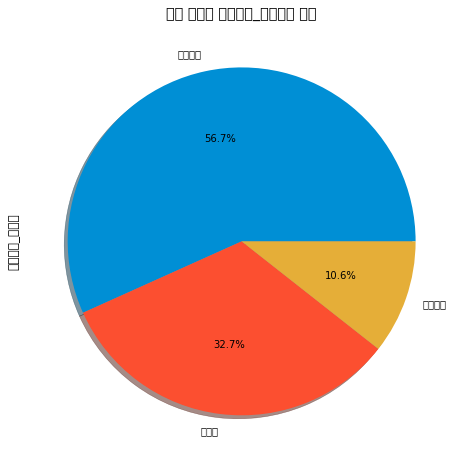

In [50]:
## 서울만 파이 플롯으로 그려보겠습니다!
f,ax=plt.subplots(1,1,figsize=(18,8))
labels = list(data.사고유형_대분류.unique())
data[data['발생지시도']=='서울'].groupby(['사고유형_대분류'])['사고유형_대분류'].count().plot.pie(autopct='%1.1f%%', labels=labels,shadow=True)
ax.set_title('서울 사고의 사고유형_대분류별 분류')


차대 사람의 비율 이 높은 지역 : 서울, 광주, 제주

차대차 비율이 높은 지역 : 전북, 충남, 경북, 충북, 세종

비등비등한 지역 : 나머지.
    
로 알 수 있었습니다. 의미 있는 해석이 되었습니다..!

### 도로형태_대분류에 따른 분류

In [51]:
data.도로형태_대분류.unique()

array(['단일로', '교차로', '기타/불명', ' 횡단 후진등 금지위반(부당한 회전)', '어린이보호위반', ' 최저속도',
       '보행자통행방해행위)', '유턴', '기타', '불명', '주차장'], dtype=object)

In [52]:
loadList = list(data.도로형태_대분류.unique())
loadList

for loadtype in loadList:
    print(loadtype, ' 형태의 도로의 사고유형 대분류')
    print(data[data['도로형태_대분류']==loadtype].groupby(['사고유형_대분류'])['사고유형_대분류'].count())
    print('\n---------\n')

단일로  형태의 도로의 사고유형 대분류
사고유형_대분류
차대사람    8670
차대차     7754
차량단독    5847
Name: 사고유형_대분류, dtype: int64

---------

교차로  형태의 도로의 사고유형 대분류
사고유형_대분류
차대사람    4152
차대차     5257
차량단독    1095
Name: 사고유형_대분류, dtype: int64

---------

기타/불명  형태의 도로의 사고유형 대분류
사고유형_대분류
차대사람    215
차대차     158
차량단독    185
Name: 사고유형_대분류, dtype: int64

---------

 횡단 후진등 금지위반(부당한 회전)  형태의 도로의 사고유형 대분류
사고유형_대분류
차대사람     25
차대차     156
Name: 사고유형_대분류, dtype: int64

---------

어린이보호위반  형태의 도로의 사고유형 대분류
사고유형_대분류
차대사람    36
차대차     34
차량단독    48
Name: 사고유형_대분류, dtype: int64

---------

 최저속도  형태의 도로의 사고유형 대분류
사고유형_대분류
차대사람    13
차대차      3
차량단독     1
Name: 사고유형_대분류, dtype: int64

---------

보행자통행방해행위)  형태의 도로의 사고유형 대분류
사고유형_대분류
차대사람    107
차대차       6
Name: 사고유형_대분류, dtype: int64

---------

유턴  형태의 도로의 사고유형 대분류
사고유형_대분류
차대차    9
Name: 사고유형_대분류, dtype: int64

---------

기타  형태의 도로의 사고유형 대분류
사고유형_대분류
차대사람    136
차대차      99
차량단독    104
Name: 사고유형_대분류, dtype: int64

---------

불명  형태의 도로의 사고유형 대분류
사고유형_대분류
차대사람    3
차대차     8

Text(0.5, 1.0, '단일로 사고의 사고유형_대분류별 분류')

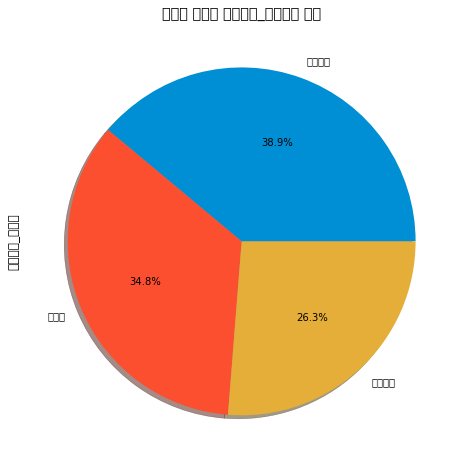

In [53]:
## 단일로만 파이 플롯으로 그려보겠습니다!
f,ax=plt.subplots(1,1,figsize=(18,8))
labels = list(data.사고유형_대분류.unique())
data[data['도로형태_대분류']=='단일로'].groupby(['사고유형_대분류'])['사고유형_대분류'].count().plot.pie(autopct='%1.1f%%', labels=labels,shadow=True)
ax.set_title('단일로 사고의 사고유형_대분류별 분류')


결과를 보면, 
차대사람 비율이 높은 경우 : 단일로, 기타/불명, 보행자 통행 방해 등등..

차대차 비율이 높은 경우 :  교차로, 등등..

차량 단독의 비율이 높은 경우 : 없음

으로 알 수 있었습니다.



### 당사자종별_1당_대분류 에 따른 분류

In [54]:
attackCarTypeList = list(data.당사자종별_1당_대분류.unique())
attackCarTypeList

for attackCarType in attackCarTypeList:
    print(attackCarType, ' 와 같은 가해자 차종에 따른 사고유형 대분류')
    print(data[data['당사자종별_1당_대분류']==attackCarType].groupby(['사고유형_대분류'])['사고유형_대분류'].count())
    print('\n---------\n')

승용차  와 같은 가해자 차종에 따른 사고유형 대분류
사고유형_대분류
차대사람    7911
차대차     5714
차량단독    2947
Name: 사고유형_대분류, dtype: int64

---------

승합차  와 같은 가해자 차종에 따른 사고유형 대분류
사고유형_대분류
차대사람    1482
차대차      707
차량단독     207
Name: 사고유형_대분류, dtype: int64

---------

원동기장치자전거  와 같은 가해자 차종에 따른 사고유형 대분류
사고유형_대분류
차대사람     67
차대차     712
차량단독    508
Name: 사고유형_대분류, dtype: int64

---------

이륜차  와 같은 가해자 차종에 따른 사고유형 대분류
사고유형_대분류
차대사람     219
차대차     1605
차량단독    1352
Name: 사고유형_대분류, dtype: int64

---------

화물차  와 같은 가해자 차종에 따른 사고유형 대분류
사고유형_대분류
차대사람    2960
차대차     3419
차량단독    1287
Name: 사고유형_대분류, dtype: int64

---------

농기계  와 같은 가해자 차종에 따른 사고유형 대분류
사고유형_대분류
차대사람     19
차대차      77
차량단독    472
Name: 사고유형_대분류, dtype: int64

---------

특수차  와 같은 가해자 차종에 따른 사고유형 대분류
사고유형_대분류
차대사람    109
차대차     178
차량단독     59
Name: 사고유형_대분류, dtype: int64

---------

자전거  와 같은 가해자 차종에 따른 사고유형 대분류
사고유형_대분류
차대사람     47
차대차     490
차량단독    189
Name: 사고유형_대분류, dtype: int64

---------

교차로부근  와 같은 가해자 차종에 따른 사고유형 대분류
사고유형_대분류
차대사람    21
차대차

Text(0.5, 1.0, '승용차 사고의 사고유형_대분류별 분류')

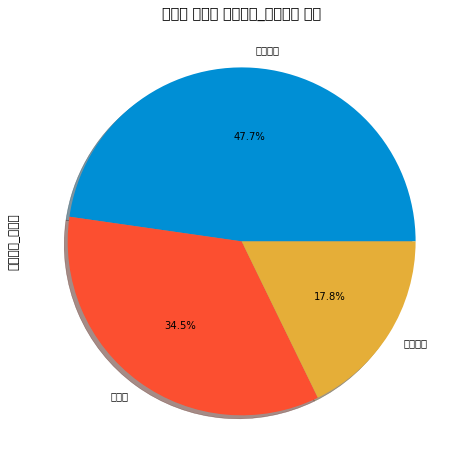

In [55]:
## 승용차 사고만 파이 플롯으로 그려보겠습니다!
f,ax=plt.subplots(1,1,figsize=(18,8))
labels = list(data.사고유형_대분류.unique())
data[data['당사자종별_1당_대분류']=='승용차'].groupby(['사고유형_대분류'])['사고유형_대분류'].count().plot.pie(autopct='%1.1f%%', labels=labels,shadow=True)
ax.set_title('승용차 사고의 사고유형_대분류별 분류')


결과를 보면, 
차대사람 비율이 높은 경우 : 승용차, 승합차, 

차대차 비율이 높은 경우 : 원동기장치자전거, 화물차, 자전거, 

차량 단독의 비율이 높은 경우 : 농기계

위와 같음을 알 수 있었습니다~!

## Feature Engineering and Data Cleaning

### 필요없는 컬럼 제거하기

위 5가지 인풋과 아웃풋 1개를 제외한 나머지는 다 제거할 예정입니다.

In [56]:
data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '사상자분류', '주야분류'],
      dtype='object')

In [57]:
column_set = set(data.columns)

In [58]:
wants_set = {'발생지시도', '사고유형_대분류','도로형태_대분류', '당사자종별_1당_대분류','사상자분류', '주야분류'}

In [59]:
deleteIndexList = list(column_set.difference(wants_set))

In [60]:
deleteIndexList

['법규위반',
 '주야',
 '발생년월일시',
 '발생지시군구',
 '경상자수',
 '중상자수',
 '발생분',
 '사상자수',
 '부상신고자수',
 '요일',
 '사망자수',
 '법규위반_대분류',
 '발생년',
 '당사자종별_1당',
 '당사자종별_2당_대분류',
 '사고유형',
 '도로형태',
 '사고유형_중분류',
 '당사자종별_2당']

In [61]:
data = data.drop(deleteIndexList, axis =1)

In [62]:
data

,발생지시도,사고유형_대분류,도로형태_대분류,당사자종별_1당_대분류,사상자분류,주야분류
0,서울,차대사람,단일로,승용차,1,1
1,전북,차대차,단일로,승용차,3,1
2,충남,차량단독,단일로,승용차,1,0
3,경남,차대차,교차로,승합차,2,0
4,경북,차량단독,단일로,승용차,1,1
...,...,...,...,...,...,...
34140,경기,차대사람,보행자통행방해행위),교차로내,3,1
34141,경기,차대차,단일로,승용차,1,1
34142,경기,차대차,단일로,화물차,2,0
34143,충남,차량단독,단일로,사륜오토바이(ATV),1,0


### 명목형 값을 특정 숫자로 변환하기

#### 발생지시도 값 먼저 변환해보기

In [63]:
#lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_Area_value = dict(zip(data.발생지시도.unique(), range(len(data.발생지시도.unique()))))
lookup_Area_value
                         

{'서울': 0,
 '전북': 1,
 '충남': 2,
 '경남': 3,
 '경북': 4,
 '전남': 5,
 '충북': 6,
 '부산': 7,
 '경기': 8,
 '인천': 9,
 '광주': 10,
 '울산': 11,
 '강원': 12,
 '대구': 13,
 '제주': 14,
 '대전': 15,
 '세종': 16}

In [64]:
lookup_Area_value.keys()

dict_keys(['서울', '전북', '충남', '경남', '경북', '전남', '충북', '부산', '경기', '인천', '광주', '울산', '강원', '대구', '제주', '대전', '세종'])

In [65]:
lookup_Area_value.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [66]:
data['발생지시도'].replace(list(lookup_Area_value.keys()),list(lookup_Area_value.values()),inplace=True)

In [67]:
data.head()

,발생지시도,사고유형_대분류,도로형태_대분류,당사자종별_1당_대분류,사상자분류,주야분류
0,0,차대사람,단일로,승용차,1,1
1,1,차대차,단일로,승용차,3,1
2,2,차량단독,단일로,승용차,1,0
3,3,차대차,교차로,승합차,2,0
4,4,차량단독,단일로,승용차,1,1


In [68]:
data.iloc[5:10]

,발생지시도,사고유형_대분류,도로형태_대분류,당사자종별_1당_대분류,사상자분류,주야분류
5,4,차량단독,단일로,승용차,1,0
6,3,차량단독,단일로,승용차,2,0
7,4,차량단독,단일로,원동기장치자전거,1,1
8,2,차량단독,단일로,승용차,2,1
9,0,차대차,교차로,승합차,3,1


#### 다른 컬럼 이제 바꾸기

In [69]:
lookup_LoadType_value = dict(zip(data.도로형태_대분류.unique(), range(len(data.도로형태_대분류.unique()))))
data['도로형태_대분류'].replace(list(lookup_LoadType_value.keys()),list(lookup_LoadType_value.values()),inplace=True)

In [70]:
lookup_AttackCarType_value = dict(zip(data.당사자종별_1당_대분류.unique(), range(len(data.당사자종별_1당_대분류.unique()))))
data['당사자종별_1당_대분류'].replace(list(lookup_AttackCarType_value.keys()),list(lookup_AttackCarType_value.values()),inplace=True)

# 사고유형_대분류만 목표 변수니까 이름을 value로 하겠다.
lookup_AccidentType_name = dict(zip(range(len(data.사고유형_대분류.unique())), data.사고유형_대분류.unique()))
data['사고유형_대분류'].replace(list(lookup_AccidentType_name.values()),list(lookup_AccidentType_name.keys()),inplace=True)

In [71]:
data.head()

,발생지시도,사고유형_대분류,도로형태_대분류,당사자종별_1당_대분류,사상자분류,주야분류
0,0,0,0,0,1,1
1,1,1,0,0,3,1
2,2,2,0,0,1,0
3,3,1,1,1,2,0
4,4,2,0,0,1,1


In [72]:
lookup_DayType_value = {'주간': 0, '야간':1}
lookup_DayType_value

{'주간': 0, '야간': 1}

In [73]:
def lookup_CasualtiesType_value(num):
    if num >=3 :
        return 3
    else :
        return num

In [74]:
lookup_CasualtiesType_value(65)

3

#### 만들어진 lookup dictionary 확인하기

In [75]:
# 입력변수 관련 dictionary 확인.
print(lookup_Area_value)
print()
print(lookup_LoadType_value)
print()
print(lookup_AttackCarType_value)
print()
# lookup_CasualtiesType_value 함수 확인.
print(lookup_DayType_value)
print()
# 목표 변수 관련 dictionary 확인.
print(lookup_AccidentType_name)


{'서울': 0, '전북': 1, '충남': 2, '경남': 3, '경북': 4, '전남': 5, '충북': 6, '부산': 7, '경기': 8, '인천': 9, '광주': 10, '울산': 11, '강원': 12, '대구': 13, '제주': 14, '대전': 15, '세종': 16}

{'단일로': 0, '교차로': 1, '기타/불명': 2, ' 횡단 후진등 금지위반(부당한 회전)': 3, '어린이보호위반': 4, ' 최저속도': 5, '보행자통행방해행위)': 6, '유턴': 7, '기타': 8, '불명': 9, '주차장': 10}

{'승용차': 0, '승합차': 1, '원동기장치자전거': 2, '이륜차': 3, '화물차': 4, '농기계': 5, '특수차': 6, '자전거': 7, '교차로부근': 8, '건설기계': 9, '단일로': 10, '교차로내': 11, '기타단일로': 12, '불명': 13, '횡단보도부근': 14, '횡단보도상': 15, '교차로': 16, '기타/불명': 17, '고가도로위': 18, '교량위': 19, '사륜오토바이(ATV)': 20, '기타': 21, '개인형이동수단(PM)': 22, '교차로횡단보도내': 23, '지하차도(도로)내': 24}

{'주간': 0, '야간': 1}

{0: '차대사람', 1: '차대차', 2: '차량단독'}


## Predictive Modeling

저는 
입력 변수(독립변수)를
당사자종별_1당_대분류,	도로형태_대분류,	발생지시도,	사상자분류,	주야분류 로 하였습니다.

그리고 
출력변수(종속변수)를

사고유형_대분류로 하였습니다.


그래서 사고유형_대분류를 추정할 수 있는 모델을 만들었습니다.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [77]:
data.head()

,발생지시도,사고유형_대분류,도로형태_대분류,당사자종별_1당_대분류,사상자분류,주야분류
0,0,0,0,0,1,1
1,1,1,0,0,3,1
2,2,2,0,0,1,0
3,3,1,1,1,2,0
4,4,2,0,0,1,1


In [78]:
# X_fruits = fruits[['height', 'width', 'mass', 'color_score']]
# y_fruits = fruits['fruit_label']
X_data = data[data.columns.difference(['사고유형_대분류'])]
y_data = data[['사고유형_대분류']]

In [79]:
data.columns.difference(['사고유형_대분류'])

Index(['당사자종별_1당_대분류', '도로형태_대분류', '발생지시도', '사상자분류', '주야분류'], dtype='object')

In [80]:
X_data.head()

,당사자종별_1당_대분류,도로형태_대분류,발생지시도,사상자분류,주야분류
0,0,0,0,1,1
1,0,0,1,3,1
2,0,0,2,1,0
3,1,1,3,2,0
4,0,0,4,1,1


In [81]:
y_data.head()

,사고유형_대분류
0,0
1,1
2,2
3,1
4,2


### 데이터 나누기

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 0)

### 학습하고 평가하기 

multi-classification이라서 precision score와 recall score를 계산할 수 없었습니다.

In [83]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
# precisionList = []
# recallList = []
clfTrainingScoreList=[]
clfTestScoreList=[]

for name, model in models :
    model.fit(X_train, y_train)
    clfTrainingScoreList.append(model.score(X_train, y_train))
    clfTestScoreList.append(model.score(X_test, y_test))
#    y_predicted = model.predict(X_test)
    names.append(name)
#     precisionList.append(precision_score(y_test, y_predicted))
#     recallList.append(recall_score(y_test, y_predicted))
#  멅티 클래시피케이션이라 

for name, trainingScore, testScore in zip(names, clfTrainingScoreList, clfTestScoreList):
    #print(names[i], 'precision : ', '{:.2f}'.format(precisionList[i]), 'recall : ', '{:.2f}'.format(recallList[i]))
    print(name, 'trainingScore : ', '{:.2f}'.format(trainingScore), 'testScore : ', '{:.2f}'.format(testScore))

LR trainingScore :  0.54 testScore :  0.55
SVM trainingScore :  0.58 testScore :  0.58
DT trainingScore :  0.66 testScore :  0.63
RF trainingScore :  0.66 testScore :  0.63


### 그래프로 표현하기

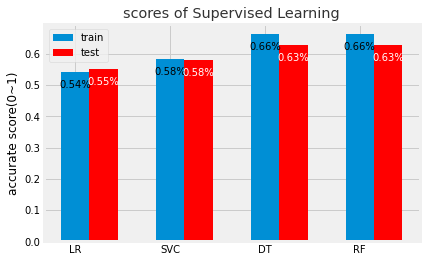

In [84]:
plt.figure()
xvals = range(len(clfTrainingScoreList))
bar1 = plt.bar(xvals, clfTrainingScoreList, width = 0.3)
new_xvals = []
for item in xvals:
    new_xvals.append(item + 0.3)
bar2 = plt.bar(new_xvals, clfTestScoreList, width = 0.3 , color = 'red')
nameList = ['LR', 'SVC', 'DT', 'RF']
pos = np.arange(len(nameList))
plt.xticks(pos, nameList)
plt.ylabel('accurate score(0~1)')
plt.title('scores of Supervised Learning', alpha=0.8)
plt.legend(['train', 'test'])
for bar in (bar1):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() -0.05,
        '%.2f' % float(bar.get_height()) + "%",
        horizontalalignment='center',
        color='black',
        #weight='bold',
        #fontsize=11
)
for bar in (bar2):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() -0.05,
        '%.2f' % float(bar.get_height()) + "%",
        horizontalalignment='center',
        color='white',
        #weight='bold',
        #fontsize=11
)

어떤 모델에서 테스트셋 구분에 가장 좋은 성능을 보이는지 보았더니
렌덤 포레스트와 의사결정 트리로 밝혀졌습니다.

### 예측해보기

 그렇다면 사상자수가 3명이상 인 사고, 
 
주간에 서울에서 단일로에서 승용차 사고로 사상자수가 4명이 발생했을때,
그 사고의 사고유형 대분류를 예측해보겠습니다.

In [85]:
X_data.head()

,당사자종별_1당_대분류,도로형태_대분류,발생지시도,사상자분류,주야분류
0,0,0,0,1,1
1,0,0,1,3,1
2,0,0,2,1,0
3,1,1,3,2,0
4,0,0,4,1,1


In [86]:
accidentType_prediction = models[3][1].predict([[lookup_AttackCarType_value['승용차'],
                                       lookup_LoadType_value['단일로'], 
                                       lookup_Area_value['서울'],
                                       lookup_CasualtiesType_value(4),
                                      lookup_DayType_value['주간']]])

In [87]:
lookup_AccidentType_name[accidentType_prediction[0]]

'차대차'

아, 차대차 사고일 것이구나 예측할 수 있습니다.

끝까지 읽어주셔서 감사합니다.!